In [13]:
import os
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from torch.utils.data import random_split

from model.crnn import CRNN
from model.MyCrnn import MyCRNN
from dataset import DatasetImg
from utils.utils import *
from utils.StrLabelConverter import *
from trainer import *

# CRNN

In [2]:
device = ( "cuda" if torch.cuda.is_available() else "cpu")
print("---------------------------------------------------")
print(f"Using {device} device")
print("---------------------------------------------------")

with open(os.path.join('data/char_v2.txt'), 'r', encoding='utf-8') as f:
    alphabet = f.read().rstrip()
# print(alphabet)
converter = StrLabelConverter(alphabet, ignore_case=False)
converter.numClass

---------------------------------------------------
Using cpu device
---------------------------------------------------


159

In [3]:
checkpoint_path = 'checkpoint/CRNN_dataTutao_Address/checkpoint-60.pth.tar'


In [4]:
# --------------------- Create Model ---------------------------------
crnn_model = CRNN(converter.numClass, 200).to(device)
# print(f"Model structure: {model}\n\n")
# for name, param in model.named_parameters():
#     print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

criterion = torch.nn.CTCLoss().to(device)
optimizer = torch.optim.Adam(crnn_model.parameters(), lr=0.001)

epoch = 0
if checkpoint_path:
    checkpoint = torch.load(checkpoint_path, map_location=torch.device(device))
    crnn_model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    log = checkpoint['log']

>>>> use CRNN-------------



In [5]:
log

[{'type': 'train',
  'epoch': 1,
  'avg_Loss': 4.54317756522891,
  'levenshtein_Loss': 50.82255822036844},
 {'type': 'train',
  'epoch': 2,
  'avg_Loss': 3.8305930759826383,
  'levenshtein_Loss': 50.82325338894682},
 {'type': 'train',
  'epoch': 3,
  'avg_Loss': 3.7219792333874056,
  'levenshtein_Loss': 50.82325338894682},
 {'type': 'train',
  'epoch': 4,
  'avg_Loss': 3.5854733320918397,
  'levenshtein_Loss': 50.82325338894682},
 {'type': 'train',
  'epoch': 5,
  'avg_Loss': 3.526837513021682,
  'levenshtein_Loss': 50.82325338894682},
 {'type': 'val',
  'epoch': 5,
  'avg_Loss': 3.606146052794356,
  'levenshtein_Loss': 49.94433781190019},
 {'type': 'train',
  'epoch': 6,
  'avg_Loss': 3.2920829155066382,
  'levenshtein_Loss': 46.8310740354536},
 {'type': 'train',
  'epoch': 7,
  'avg_Loss': 2.6537216711591256,
  'levenshtein_Loss': 35.049356969064995},
 {'type': 'train',
  'epoch': 8,
  'avg_Loss': 2.2016548909865863,
  'levenshtein_Loss': 26.641988182134167},
 {'type': 'train',
  'ep

# MyCRNN

In [2]:
pretrained = 'pretrain/MyCrnn/model_75.pth.tar'

In [3]:
device = ( "cuda" if torch.cuda.is_available() else "cpu")
print("---------------------------------------------------")
print(f"Using {device} device")
print("---------------------------------------------------")

with open(os.path.join('data/mychar.txt'), 'r', encoding='utf-8') as f:
    alphabet = f.read().rstrip()
# print(alphabet)
converter = StrLabelConverter(alphabet, ignore_case=False)
converter.numClass

---------------------------------------------------
Using cpu device
---------------------------------------------------


155

In [4]:
# --------------------- Create Model ---------------------------------
model = MyCRNN(converter.numClass, 125, 0.1).to(device)
# print(f"Model structure: {model}\n\n")
# for name, param in model.named_parameters():
#     print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

criterion = torch.nn.CTCLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epoch = 0
if pretrained:
    checkpoint_path = pretrained
    checkpoint = torch.load(checkpoint_path, map_location=torch.device(device))
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']

>>>> use MyCrnn-------------



# Predict

In [6]:
from tester import Tester

tester = Tester(crnn_model, criterion, converter)

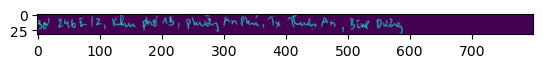

9ố 46B/3, Khu pú 15, Phường An Phú, TX Thượn An, Bình Dương


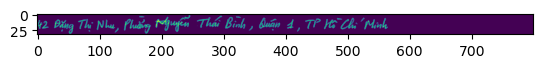

12 Đng Thị Mhu, Phường Nguyễn Thái Bình, Quận 1, TP Hồ Chí Minh


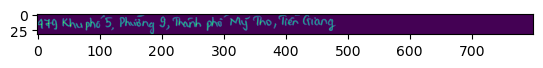

479 Khu phố 5, Phường 9, Thành Phố Mỹ The, Tiền Giang


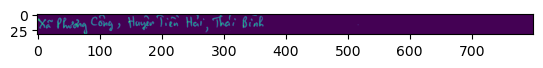

4ã Phương Công, Huyện Tiên Hải, Thái Bình


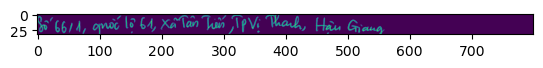

Số 66/1, quất lộ 61, Xã Tân Tiến,TNpgị Thanh, Hậu Giang


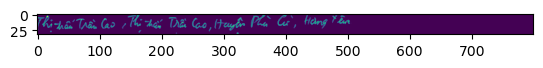

Ttiãu Trền Cao, Thị tã Tiền Cao, Huyện Pà Cỏ, Vưng Yên


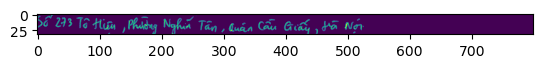

Số 273 Tô Hiệu, Phường Nghéa Tân, Quận Cầu Giấy, Hà Nội


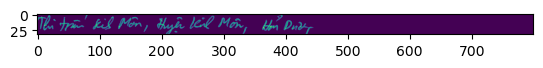

Thị trất Kình Nôn, Huyện Vĩnh Môn, Hắi Dưang


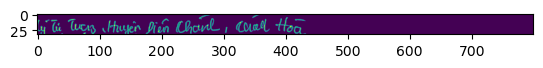

K Tr Trọng, Huyện Biên Khánh, Kúách Hoà


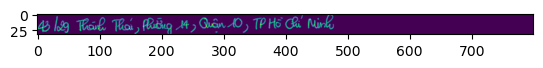

4314 Thánh Thái, Phường 10, Quận 10, TP Hồ Chí Minh


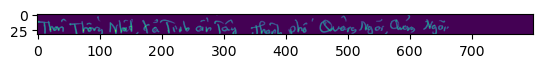

Thôn Thông Niật, Xã Tinh ến Tây, tThốn, phố Pương Ngãi, Chán Ngi


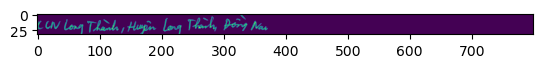

101/ Long Thành, Huyện Cong Thình Bồng Nai


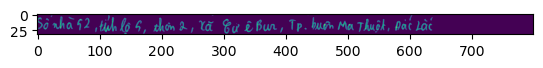

Số nhà 92, kkh Bộ 6, đhôn 2, Xã Gi Ra, TP. huôn Ma Thiệt, Bắc Nắc


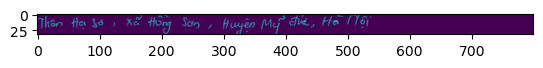

Thôn Hạ Sơ, Xã Hồng Sơn, Huyện Mỹ Đức, Hà Nội


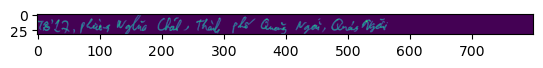

5ổ132, Phầàng Nghữ Chát, Thành phố Quán Ngãái, Cuai Ngyi


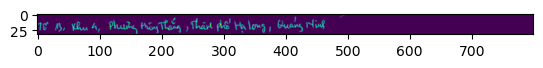

Số D, Khu V, Phường Hảy Thắng, Thận Hhế NToang, Quảng Ninh


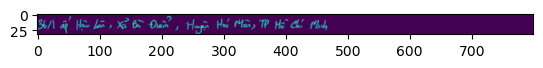

31 ấp Hậi Lân, Xã Bà Điển, Huyện Húc Man, TP Hồ Cí Minh


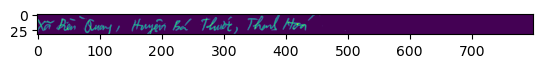

Xõ Biển Buang, Huyện Bá Thưc, Thịnh Hóá


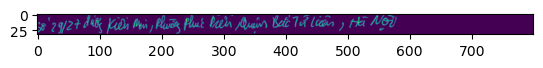

Số 592A Đỹ Kiển Pi, Phưng Phú Diên, Puận Kiê Từờ Liêm, Hà Nội


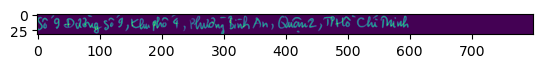

Số 9 Đường sốỗ 3, Khu phố 4, Phường Bình An, Quận2, THồ Chí Minh


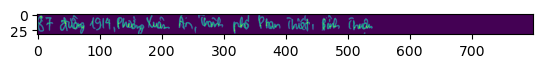

87 Đường 194 Phương Liên An, Thành phố Aan Thượt, Bình Thuệu


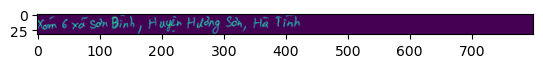

Xóm 6 xã Sơn Bình, Huyện Hương Sơn, Hà Tĩnh


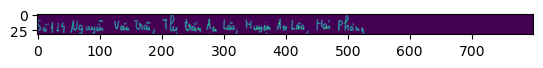

Số19 Nguyễn Văn Trãi, Thị trấn Kin Lộp, Huyện Nị Lợai, Hải Phòng


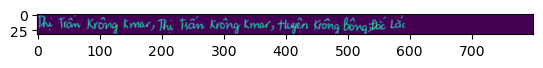

Thị Tiấn Kông Kuam, Thị trấn Kiông Kam, Huyện Hông Bông Đắc áắi


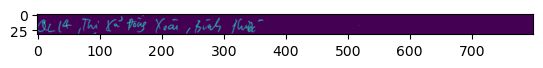

B2/1, Thị Xã Đôyg Xiàu, Bình Phỹ


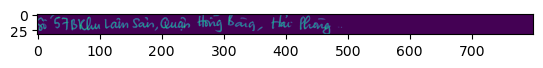

Số 578 Khu Lân Sân, Quận Hồng Bàng, Hải Phòng


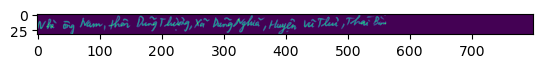

1Hà ây Nam, thôn Dùỳg Thượng, Xà Rùng Nghê, Huyện Vê Thự, Thái Bì


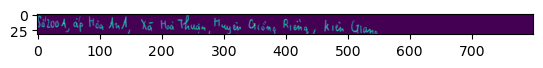

Sin 1, ấp Hai 1in1, Xã Hả Thuận, Huyên Giờng Biếng, Kiên Gang


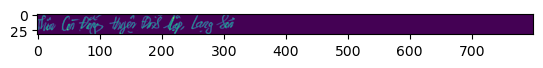

Tửờ Côi, Đấpg, Huyện Bình Vệ, Lạng Sờn


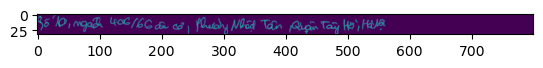

Số V, ngấnh V426 Kh Tâu ở, Phường Niệt Tân, Puyện Tây Hêi, Huệ


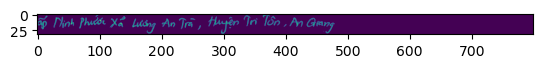

p Ninh Phước Xã Lương An Trà, Huyện TÔn Tân, An Giang


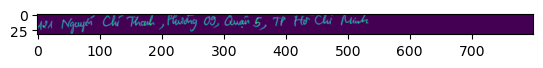

11 Nguyễn Chí Thanh, Phường 00, Quận 5, TP Hồ Chí Minh


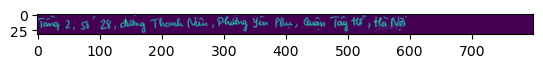

Tầng 2, số 28, đường Thanh Niêu, Phường Yên Phụ, Quận Tây Hồ, Hà Nội


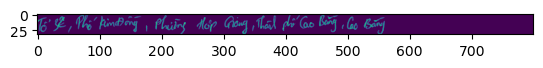

Số 38, Phố Kiê Đồng, Phường Hộp Giang, Thấnh phố Ca Bồng, Ca Bồng


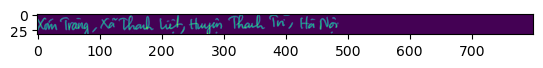

Xóm Trùng, Xã Thanh Liệt, Huyện Thanh Trì, Hà Nội


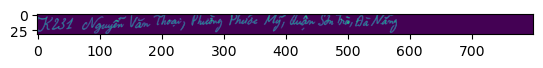

1K231 Nguyễn Văn Thạọc, Phường Phước Mỹ, Quận Sơi, Tà, Đà Nẵng


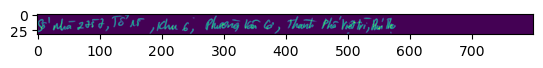

Số nhà 2nt, Tổ 15, khu 6, Phường Kên 6, Thành Phố Vgê , Aì Tịn ho


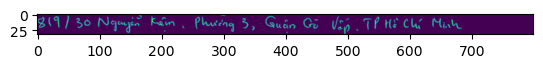

317/30 Nguyễn Kân, Phường 3, Quận Gò Vấp, TP Hồ Chí Minh


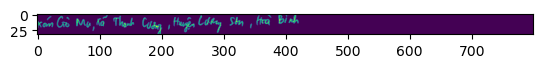

Sấn Gò Mm, Xã Thụ Cương, Huyện Lương Âhn, Hàa Bình


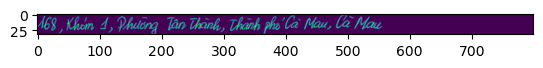

16B, Khóm 1, Phường Tân Thành, Thành phố Cà Mau, Cà Mau


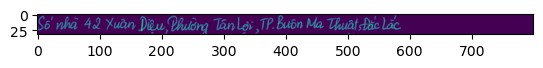

Số nhà 42 Xuân Diệu, Phường Tân Lợi, TPBiôn Ma Thuột Đắc Lắc


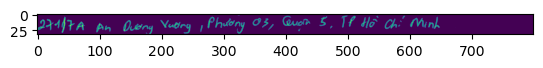

24417A Am Dương Vương, Phường 03, Quận 3, TP Hồ Chí Minh


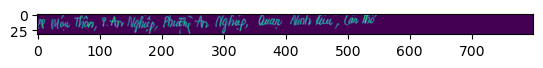

P Núại Than, PAn Nghấy, Phường An Nghỷp, Quận Min Quau, lên Pồ


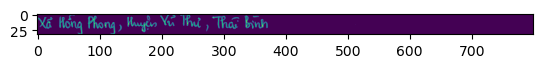

Xõ Hồng Phung, Huyện Vĩ Thư, Thái Bình


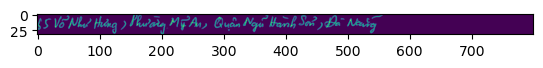

15 Võ Nhú Hưng, Phường Mộ A, Quận Ngũ Bành Sơn, Đà Nẵng


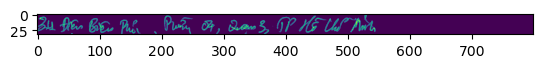

31 Điện Biên Phủ, Pường 07, Quận 3, TP Hồ Chí Minh


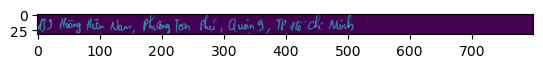

89 Hùng Hảu Nam, Phường Tân Phú, Quận 9, TP Hồ Chí Minh


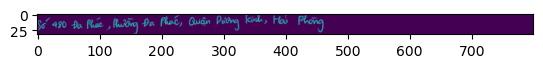

Số 110A Púc, Phường Đa Phớc, Quận Đương Bình, Hải Pòng


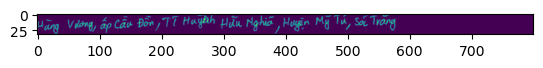

4ông Vương, ấp Cân Đồn, TT Huynh Hữu Nghê, Huyện Mỹ Tự, Sắ Tròng


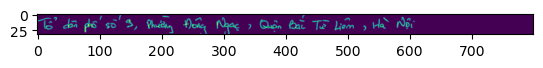

Tổ dân pố Số 9, Phường Đông Ngạc, Quận Bắc Từ Lâm, Hà Nội


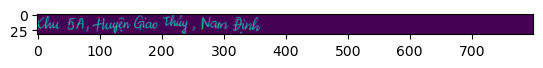

Khu 5A, Huyện Giao Thuỷ, Nam Định


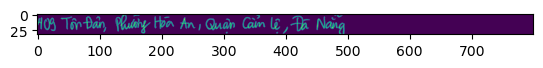

189 Trôn Điên, Phường Hòn An, Quận Cấm Lệ, Đà Nẵng


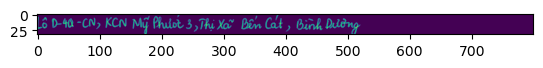

6ôD4A 0A, KN Mỹ Phước 3, Thị Xã Bến Cát, Bình Dương


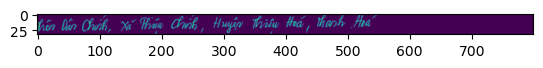

Bôn Vên Chính, Xã Phợp Chính, Huyện Thược Hoá, Thanh Hoá


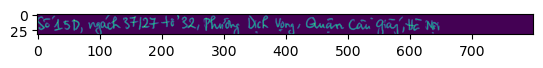

Số 159, ngánh 37/27 tổ 32, Phường Dịch Vọng, Quận Cầu Điấ, Hà Nội


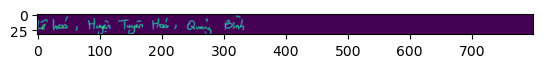

L hái, Huyệ Tuyên Hảá, Quảng Bình


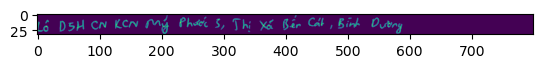

Lô D5A C1 KCn1 Mỹ Phước 3, Thị Xã Bíi Cát, Bình Dương


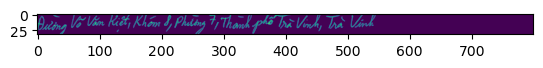

Đường Võ Vớn Hiệi, Khón , Phường 7, Thàn ghố Trà Vinh, Thừ Vinh


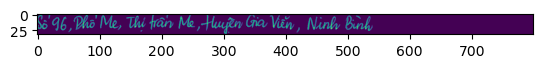

Số 96, Phố 1e, Thị trấn Mạe, Huyện Giao Viến, Ninh Bình


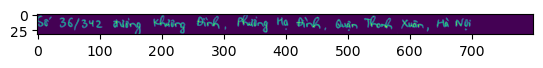

Số 38/342 Đường Khương Đình, Phường Hạ Đình, Quận Thanh Xiân, Hà Nội


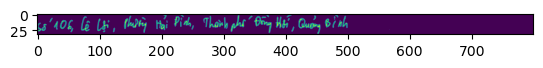

Số 108 Cê Vợi, Phường Hái Bình, Thưnh phố Đồng Hới, Quảng Bình


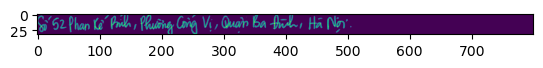

Số 62 Phum Kế Tình, Phường Cống Vị, Quận Ba Đình, Hà Nội


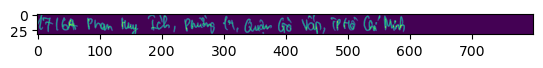

1718A Phan Kuy AI, Phường 14, Quận Gò Vấnp, TH Hồ Cí Minh


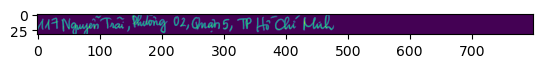

117 Nguyễn Tràu, Phường 02, Quận 5, TP Hồ Chí Minh


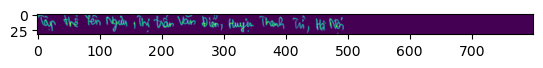

Tòp Hhê Yên Ngưá,phị tiễn Văn Điên, Huyện Thanh Tân, Hà Nội


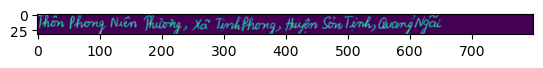

Thôn Phong Niên Phương, Xã Tnh Phong, Huyện Sơn Tịnh, Quang Ngãi


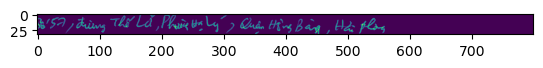

Số 59, đường Thổ Lũ, Phuỳn Vị Lý, Quậện Hông Bây, Hải Phn


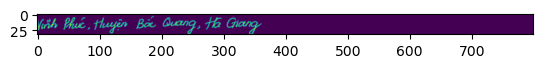

Kình Phú, Huyện Bắc Quang, Hà Giang


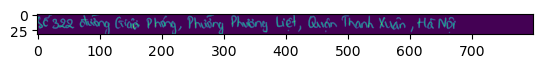

Số 322 đường Giêa Phưng, Phường Phương Liệt, Quận Thanh Kiên, Hà Nội


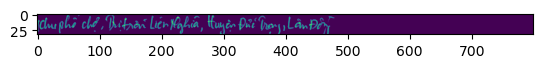

Khuyn phố 2hõ, Phhốn Lơn Nghĩa, Huyện Biê, Trạng, Lêm Đồng


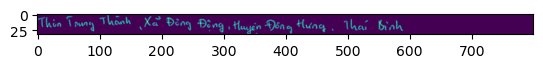

Thôn Trung Thành, Xã Đông Đọng, Huyện Đông Hưng, Thái Bình


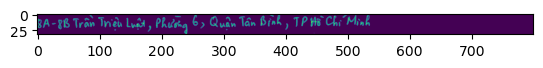

7A9B Tiần Triệu Liệt, Phường 6, Quận Tân Bình, TP Hồ Chí Minh


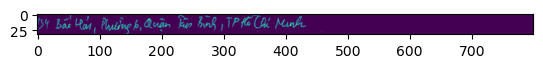

1 Sấi Hái, Phường 6, Quận Tân Bình, TP Hồ Chí Minh


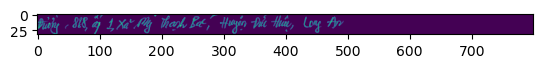

Bống, 8ố ấỹ 1 Xồ Mị Thạnh Bí, Huyện Đức Huỷc, Luyg An


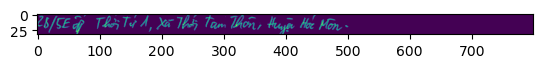

39/5ấp Thấi Trc 1, Xã Thới Tan Thôn, Huyện Hoá Nòn


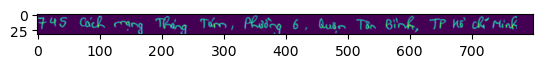

745 Cích Mọng Thông Trm, Phường 6, Quận Tân Bình, TP Hồ Chí Minh


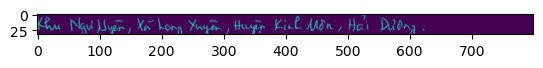

Khu Ngô Yyên, Xã Long Xuyên, Huyện Kinh Mơn, Hải Dương


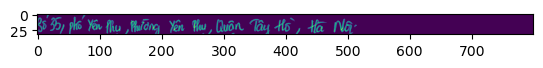

Số 85, phố Yên Phụ, Phường Yên Dụ, Quận Tây Hồ, Hà Nội


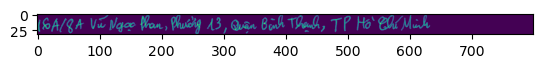

16A/8A Võ Ngọc Phan, Phường 13, Quận Bình Thạnh, TP Hồ Chí Minh


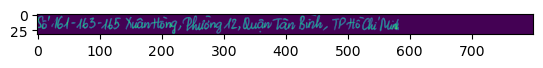

Số 161163 15 Xuên Hồng, Phường 12, Quận Tân Bình, TP Hồ Chí Mi


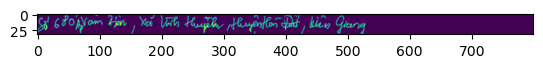

Số 8Đs iấn Đơn, Xã Vĩnh Huynh, Huện hân Đơi, Kiên Giang


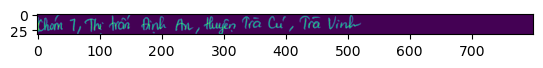

Khóm 7, Thị trấn Định An, Huyện Tà Cú, Tà Vinh


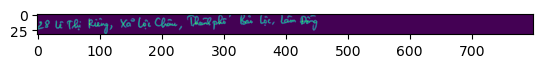

28L AĐi Riêng, Xã Lội Châu, Thàng phố Bài Gộ, Cên Đồng


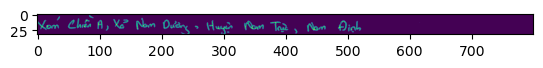

Xóm Chiên A, Xã Nam Dương, Huyện Nam Trự, Nam Định


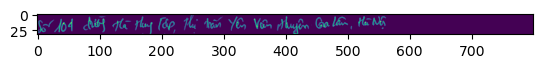

Số 14 đườpg Hà Huy Bạp Phị Tiấn Yên Văn, Huyện Ga Vân, Hà Nội


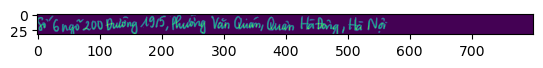

Số 6ngõ 200 Đường 195, Phường Văn Quớn, Quận Hà Đông, Hà Nội


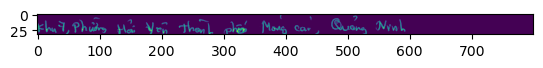

Khu 7, Phường Hai Yên, Thinh, Tiệt Mng Sái, Quảng Ninh


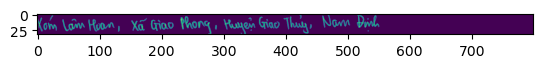

Kóm Lâm Yan, Xã Giao Phong, Huyện Giao Thuỷ, Nam Định


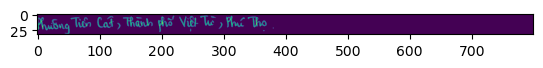

Phường Tiên Cật, Thành Phố Việt Tr, Phú Thọ


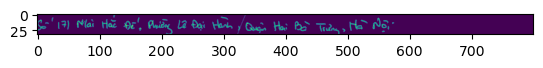

Số 191 Mãi Hă Đế, Pường Lê Đại Hăn, Quận Hai Bà Tươn, Hà Nội


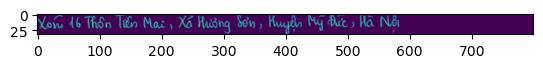

Xóm 16 Thôn Tân Mai, Xã Hương Sơn, Huyện Mỹ Đức, Hà Nội


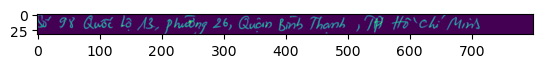

Số 98 Quốc lộ 13, Phường 26, Quận Bình Thạnh, TP Hồ Chí Minh


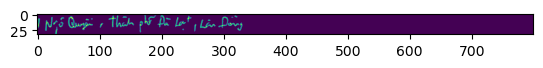

TNgõ Quộn, Thnh phố Đà Lộ, Lên Đồng


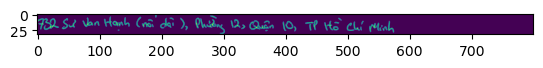

73232 Vmn Hạnh Liểi độ 3, Phường 12, Quận 1Đ, TP Hồ Chí Minh


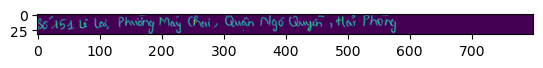

Số 151 Lê Lạ, Phường My Phai, Quận Ngô Quyên, Hải Phòng


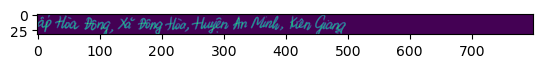

ấp Hùa Đông, Xã Đông Hòa, Huyện An Minh, Kiên Giang


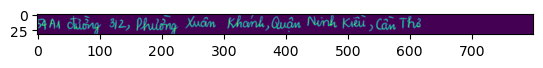

9A1 đường 92, Phường Xuân Khánh, Quận Ninh Kiều, Cần Thơ


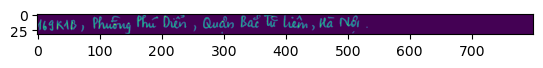

169A1A0, Phường Phú Diễn, Quận Ba Từ Liêm, Hà Nội


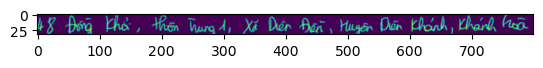

18 Đồng Khới, thôn Trung 1, Xã Diên Điệ, Huyện Dân Khánh, Khánh Hòa


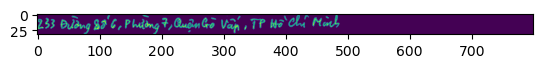

233 Đường Số 6, Phường 7, Quận Bò Vấp, TP Hồ Chí Minh


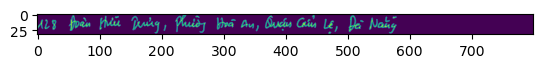

108 Phân Hữu Tương, Phường Hoà An, Quận Ciu Lợ, Đà Nẵng


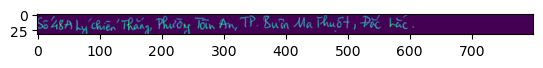

Số 18A Ug Chiên Thàng Phưây Tân An, TP.Biên Ma Thuột, Đắc Vắc


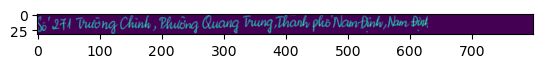

Số 271 Trường Chinh, Phường Quang Trung Thành phố, Nam Định, Nan Định


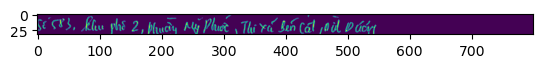

Số F03, Bu phố 2, Phường Mỹ Phúc, Thị gã Bín it, Đi Dương


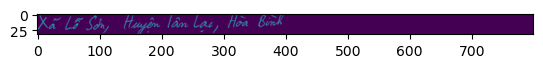

Xã Lỗ Sơn, Huyện Cân Lạc, Hòa Bình


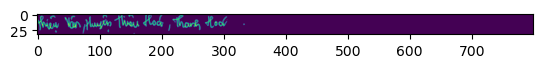

Riệ Văn, Phuyện Phùa Pước, Thanh Hoá


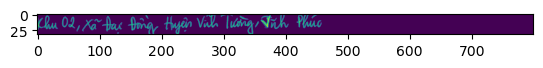

Khu 02, Xã Đạ Đồng, Huyện Vĩnh Tiừng , Đnh Phúc


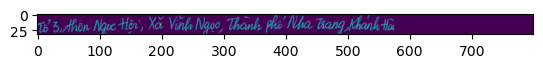

Số 3, thôn Ngọc Hội, Xã Vĩnh Ngọc, Thành Phố Nha Trang, Khánh Hà


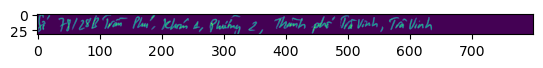

Số 77/2P Trên Phú, Khóm 1, Phường 2, Thành phố Tàn Vinh, Tàn Vinh


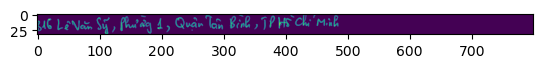

46 Lê Văn Sỹ, Phường 1, Quận Tân Bình, TP Hồ Chí Minh


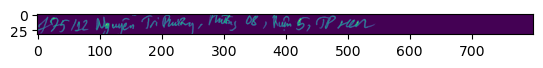

495/12 Nguyễn Tn Phương, Phường 26, Quận B, TP Hậm


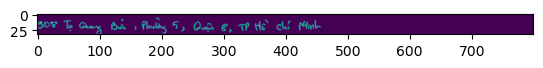

S00T Cung Báo, Phường 5, Quận 8, TP Hồ Chí Minh


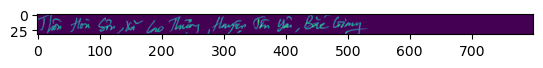

Tôn Hò Sơn, Xã Ca Thượng, Huyện Thôn Yên, Bắc Grang


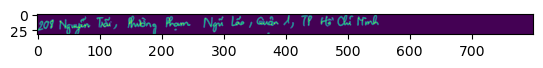

27 Nguyễn Từi, Pường Pạm Ngãi Lới, Quận 1, TP Hồ Chí Minh


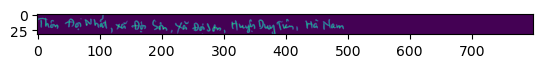

Thôn Đị Nhới, xã Đội Sơn, Hê Đơi Đơn, Huệ Duy Trà, Hà Nam


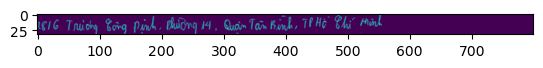

1/6 Trương Sông Dịch, Phường 14, Quận Tân Bình, TP Hồ Chí Minh


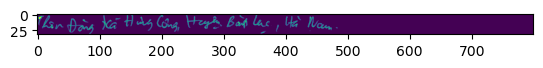

TBân Đông Xã Hưng, Công, Hượệp Bìt lạc, Hà Nai


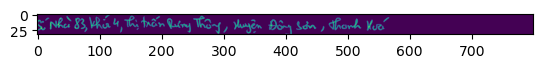

6 Nhà 83, phố 4, Phị tiấn Dương Thông, Huyện Đông Lơn, Thanh Hoá


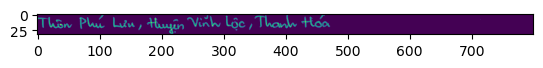

Thôn Phú Lưu, Huyện Vĩnh Lộc, Thanh Hoá


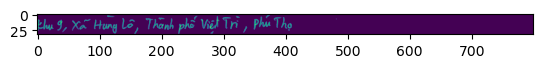

Khu 9, Xã Hùng Lê, Thành phố Hiệt Trì, Phú Thọ


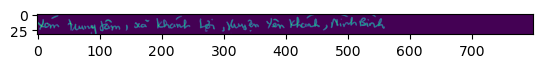

Xóm Hung Yêm, Xã Khánh Lợi, Huyện Yên Hánh, Nĩnh Bình


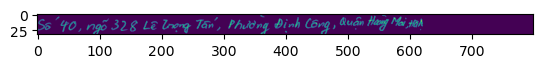

Số 40, ngõ 328 Lê rọng Tến, Phường Định Công, Quận Hòng Ha ĐạiN


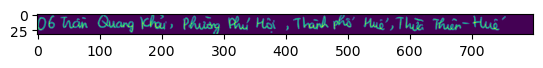

06 Trần Quang Khái, Phường Phú Hội, Thành phố Huế, Thừa Thiên- Huế


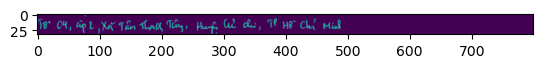

Tổ 04, ấp6, Xò Tân Hha Tây, Huyệ Cư 2ai, TP Hồ Chí Minh


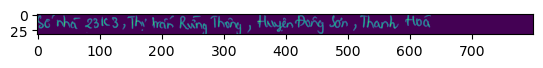

Số nhà 29K3, Thị trấn Ring Thông, Huyện Đông Sơn, Thanh Hoá


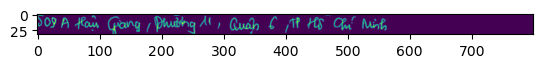

In [16]:
crnn_model.eval()
root = 'data/data_v2/test/img'
with torch.no_grad():
    for path in os.listdir(root):
        img = img_loader(root + '/' + path, imgW=800)
        input = img.unsqueeze(0).to(device)
        plt.imshow(img[0])
        plt.show()
        pred = crnn_model(input)
                
        b, l, c = pred.shape
        pred_ = pred.permute(1, 0, 2).to('cpu')
        pred_lengths = torch.full(size=(b,), fill_value=l, dtype=torch.long).to('cpu')

        _, enc_pred = pred_.max(2)
        sim_pred = converter.decode(enc_pred.view(-1), pred_lengths, raw = False)
        print(sim_pred)

## Eval dataset

In [7]:
random.seed(1708)
np.random.seed(1708)
torch.manual_seed(1708) # Comment lại để cho khởi tạo tham số ngẫu nhiên


In [8]:
from dataset_v2 import DatasetImg_v2
test_dataset = DatasetImg_v2('data/data_v2/test/img','data/data_v2/test/label')

In [9]:
tester.setDataset(test_dataset)

In [13]:
tester.eval()

Tester.eval...


100%|██████████| 25/25 [02:57<00:00,  7.10s/it]

raw: T~~~~~~~~~~~~~~~~~~~~~hhôn~~~~~~~   Tân~~~~~~    Tiến~~~~~~,,,   Xã~~~~~   Dườn~~~gg~~~~   Sơn~~~~~,,,  HHuyyệệnn~~~~~~    Đìn~~h~~~~  P~~hhnn~~g~~~~,,   Bìnn~hh~~~~   Nônn~~gg~~~~~~~~~~~~~~~~~~~~~~~
pred_text: Thôn Tân Tiến, Xã Dường Sơn, Huyện Đình Phng, Bình Nông
gt: Thôn Tân Tiến, Xã Quảng Sơn, Huyện Đắk Glong, Đắk Nông
raw: 1~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~93~  H~~mm 11~~~~~~ N~i~nnN~~  D~iim~~,,  ~~~H~~22~n~~,  P~~~~T~BB~~,   Quậnn~~~~ Tâân~~~  Bìn~~~~h~~,,,   THHHồĩ~~  Cíí~~   Miinn~hh~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
pred_text: 193 Hm 1 NinN Dim, H2n, PTB, Quận Tân Bình, THồĩ Cí Minh
gt: 243 HOANG VAN THU, P.422, Q.TB, Quận Tân Bình, TP Hồ Chí Minh
raw: 1~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~3~//~22~~,  K~hu~~~  pố~~~~ 22~,, Thịị~~  trấn~~~  Bến~~~  Léc~~~,, Huyyệệnn~~~~~  Bến~~~~  Lứcc~~,,  Lonng~~  A~n~~~~
pred_text: 13/2, Khu pố 2, Thị trấn Bến Léc, Huyện Bến Lức, Long An
gt: 42/2, khu phố 2, Thị trấn Bến Lức, Huyện Bến Lức, Lon

(1.2022733901909202, 7.694177863083813)

9ố 46B/3, Khu pú 15, Phường An Phú, TX Thượn An, Bình Dương


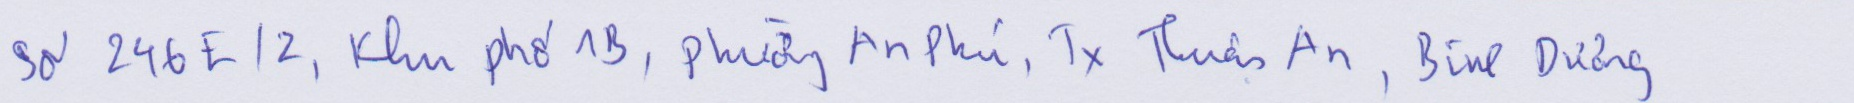

In [10]:
path = 'data/data_v2/test/img/address_0.png'
print(tester.predict(path))
Image.open(path)


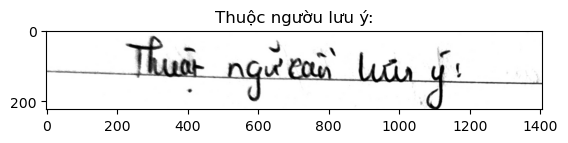

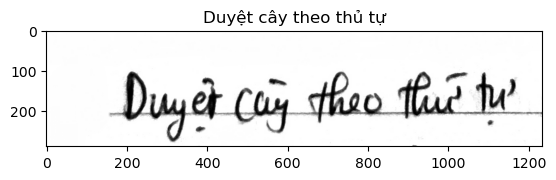

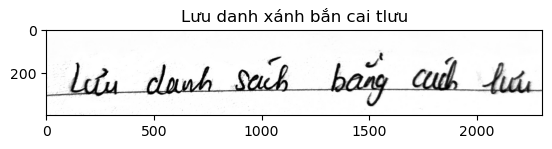

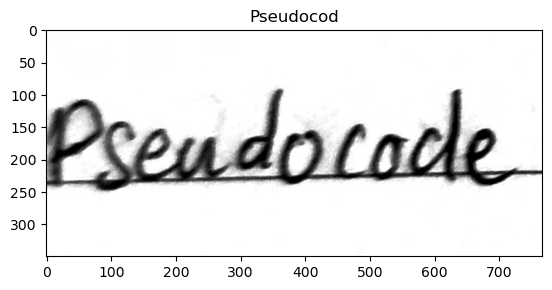

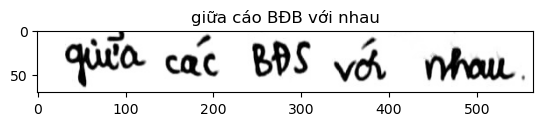

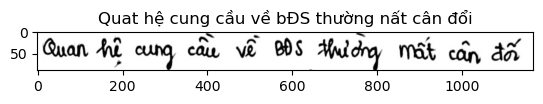

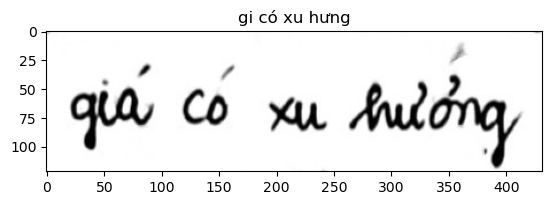

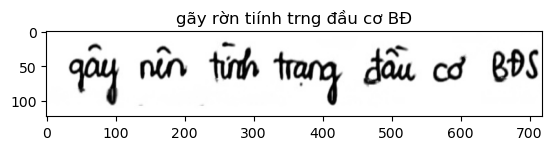

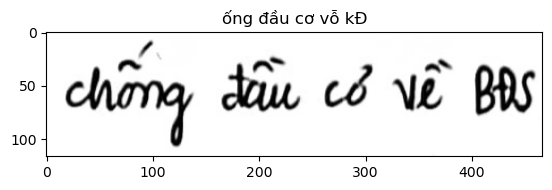

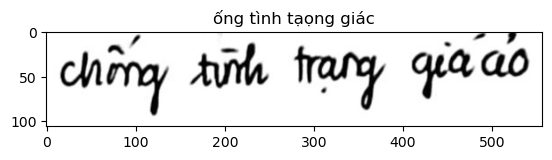

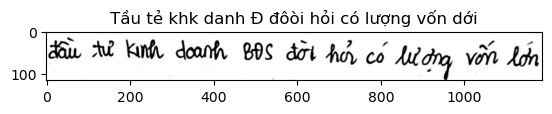

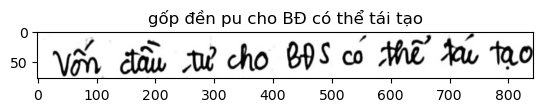

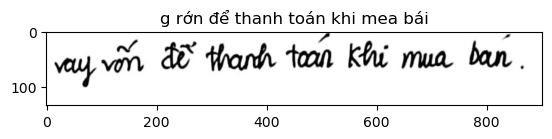

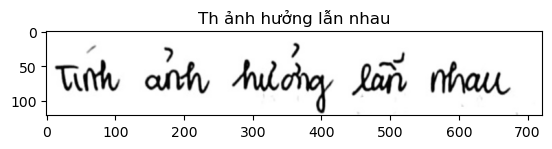

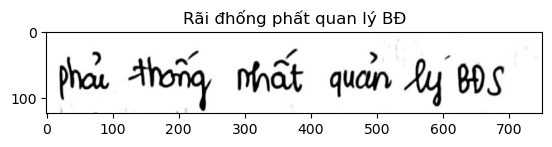

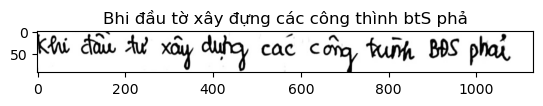

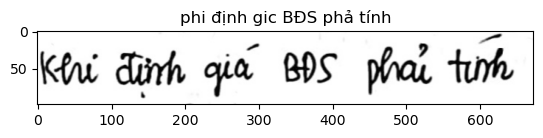

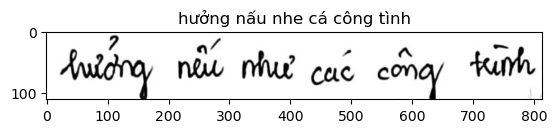

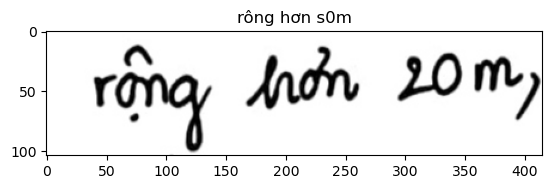

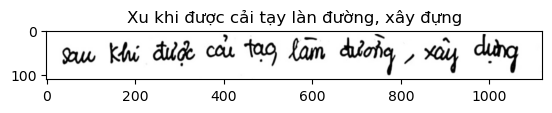

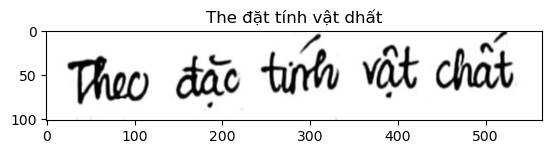

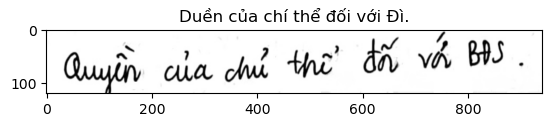

In [24]:
from PIL import Image
import matplotlib.pyplot as plt

root = 'data/data_v2/train/img'
for i, path in enumerate(reversed(os.listdir(root))):
    imgpath = root + '/' + path
    img = Image.open(imgpath)
    plt.imshow(img)
    plt.title(tester.predict(imgpath))
    plt.show()
    if i > 20: break